# **Learning to decide in a changing world**

## **Background**

Performing successfully in a changing environment requires making fast, accurate decisions and updating those decisions given the feedback that you receive. For example, imagine that you’re a coffee lover. You’re in luck! Your favorite coffee shop has two single-origin beans that you enjoy — an Ethiopian and a Jamaican light roast. You might be conflicted about your choice and take longer than usual to decide, and because both of these beans are nearly equally valuable to you, you may not choose the beans that you would have liked best. Imagine that it’s the next week and you make your usual morning visit. Because of unseasonably dry growing conditions in Jamaica, the beans that you previously liked almost as much as the Ethiopian beans taste odd, so on your next visit, you vastly prefer the alternative. How does your estimate of whether the taste of your favorite bean has changed (volatility) interact with the value you place on each type of bean (decision-conflict)? Broadly, how do estimates of volatility and decision-conflict affect decision-making and learning?
<br>
To more fully understand decision making and learning in an environment with multiple sources of uncertainty, I explore how value conflict between competing actions (the degree to which the value associated with each action is similar) and the volatility of feedback (the change point frequency of mean value-action associations) influence adaptive decision making. 

## **Variables**

### Variables, $p$
*Predictor*<br> 
> *  conflict (high/low, qualitative)<br>
*  volatility (high/low, qualitative)<br>

*Response*<br>
> *  accuracy (qualitative, 0/1)<br>
*  reaction time (quantitative)<br>

### Number of observations, $n$
5 participants with four 1000-trial sessions each.
<br><br>
 ### Method of data collection 
 In the task, we operationally define **conflict** as the mean reward difference between actions and **volatility** as the rate of change in that mean reward difference. We manipulated factors of volatility and conflict using a 2x2 within-subjects design to form four conditions, with each participant performing 1000 trials per condition and one condition per day until all conditions were complete.    

Reaction time and choice accuracy data were collected using a two-alternative forced-choice task written in PsychoPy. On each trial, participants were asked to choose the highest-reward target within 1 s. Then they were shown the reward earned on each trial based on their decision. To prevent prepotent selections, the position of the rewarding target was  randomized across trials, with the target identity as the rewarding feature (rather than target position). The instruction screen and the structure of a sample trial are below: 
<tr><td><img src='instructions.png' style='width: 700px;'></td><td><img src='task.png' style='width: 700px;'></td></tr>

## **Hypotheses**

A mixed effects logistic regression will evaluate my hypotheses regarding accuracy. Here $c$ is an indicator variable (high conflict = 1 and low conflict = 0), $v$ is an indicator variable (high volatility = 1 and low volatility = 0) and $id$ represents the subject ID: 

$$\hat{a} = \hat{\beta_0} + \hat{\beta_c}c + \hat{\beta_v}v + \hat{\beta_{cv}}cv + (1|id)$$

High volatility conditions will increase the log odds of making the correct choice relative to low volatility conditions, so $\hat{\beta_v}$ would be positive and significantly different from zero. High conflict conditions will decrease the log odds of making the correct choice relative to low conflict conditions, so $\hat{\beta_c}$ would be negative and significantly different from zero. Interaction effects may also exist such that conflict modifies the effect of volatility on the log odds of accuracy. 


<br>
A mixed effects linear regression will evaluate my hypotheses regarding reaction times: 

$$\hat{r} = \hat{\beta_0} + \hat{\beta_c}c + \hat{\beta_v}v + \hat{\beta_{cv}}cv + (1|id)$$

High volatility conditions will increase reaction time more quickly relative to low volatility conditions, so $\hat{\beta_v}$ would be positive and significantly different from zero. High conflict conditions will delay and subdue the expression of reaction time increases relative to low conflict conditions, so $\hat{\beta_c}$ would be negative and significantly different from zero. Interaction effects may also exist such that conflict modifies the effect of volatility on reaction time. 

## **Data organization**

### Data Architecture 

All behavioral data and metadata are stored within a Dropbox folder.  Each data file is named according to subject, condition, and trial set ID. For example, if my subject number was 123, my condition number was 0, and the trial set ID was 0, then my data file would be named *123_cond0_trialset0.csv*. Additionally, for each subject, system- and experiment-related metadata, such as the last computer reboot time, the versions of key modules for the experiment, the total length of the experiment for that session, and  the length of the mid-experiment break, is recorded in a separate csv file with *runInfo* appended to the file name, as below.
![image.png](data_arch.png)

In [1]:
example_metadata <- read.csv("test_cond0_trialset0_runInfo.csv")
head(example_metadata)

psychopy_version,python_version,pythonScipyVersion,pyglet_version,pygame_version,numpy_version,wx_version,window_refresh_time_avg_ms,begin_time,exp_dir,last_sys_reboot,system_platform,internet_access,total_exp_time,break_time
1.85.2,2.7.12,0.19.1,1.2.4,1.9.3,1.13.1,4.0.0b2 gtk3 (phoenix),33.33302,2018_02_02 17:49 (Year_Month_Day Hour:Min),/home/coaxlab/Dropbox/volatileValues/simple_rt_experiment,2018-02-02 16:32,linux 4.4.0-112-generic,True,24.63348,1.33224


Within the behavioral data file, key variables are stored within columns:
> * the left/right **choice** is coded as 0 or 1
> * the **accuracy** is coded as 0 (incorrect) or 1 (correct)
> * the choice corresponding to the highest point value is stored as the **solution**
> * the number of points earned on each trial is stored as **reward**
> * the reward accumulated across the experiment so far is stored as **cumulative_reward**
> * the reaction time for each trial is stored as **rt**
> * the trial time, including feedback time, is stored as **total_trial_time** 
> * the intertrial interval is stored as **iti**
> * the change point indicator (0/1) is stored with slow trial (-1) and fast trial (-2) indicators as **cp_with_slow_fast**
> * and the ASCII value for the color of the high-value cue is stored as **high_val_cue**

In [2]:
example_data <- read.csv("test_cond0_trialset0.csv")
head(example_data)

choice,accuracy,solution,reward,cumulative_reward,rt,total_trial_time,iti,cp_with_slow_fast,high_val_cue
0,0,1,0,0,1.0571220,2.711002,0.6296882,-1,112
0,0,1,46,46,0.2342849,1.896353,0.6759479,0,112
0,1,0,55,101,0.4263060,2.029746,0.6224250,0,112
1,0,0,38,139,0.3260748,1.660718,0.3501943,0,112
0,1,0,55,194,0.3734028,1.941348,0.5746767,0,112
0,0,1,41,235,0.3061411,1.755645,0.4637496,0,112


### Data Table Structure

My data table is in the tidy data format, with columns for subject ID, condition, reaction time, and accuracy. Each observation is a single row and the header of the data table refers to the names of the variables. Because I only have one type of observational unit (the participant), I store all of the data within a single data table. 

In [3]:
clean_df <- read.csv("cleaned_valC_data.csv")
colnames(clean_df)[1] <- 'trial'
sparse_df <- clean_df[,c("trial", "ID","condition","rt","accuracy")]
raw_df <- read.csv("raw_valC_data.csv")
colnames(raw_df)[1] <- 'trial'

In [4]:
head(sparse_df)
head(raw_df)

trial,ID,condition,rt,accuracy
1,758,lvhc,0.2779109,1
2,758,lvhc,0.4092290,1
3,758,lvhc,0.3257351,1
4,758,lvhc,0.3317959,1
5,758,lvhc,0.2648199,1
6,758,lvhc,0.3168850,1


trial,reward,total_trial_time,accuracy,cp_with_slow_fast,cumulative_reward,high_val_cue,iti,rt,solution,choice,ID,condition
0,0,2.564753,1,-1,0,112,0.2665031,1.2654541,1,1,758,lvhc
1,62,1.571029,1,0,62,112,0.2876267,0.2779109,1,1,758,lvhc
2,55,2.015825,1,0,117,112,0.6198438,0.4092290,1,1,758,lvhc
3,60,1.798977,1,0,177,112,0.4857087,0.3257351,1,1,758,lvhc
4,62,1.911995,1,0,239,112,0.5810355,0.3317959,0,0,758,lvhc
5,59,1.699535,1,0,298,112,0.4474356,0.2648199,1,1,758,lvhc


### Data Cleansing & Tidying 

#### Syntactic errors  
**Lexical**: Because the behavioral data is written to lists which are concatenated, there would be a concatenation error if they were of different sizes that would prevent saving the data, so I don't expect there to be any discrepancies between the intended and actual data structure format. However, is possible that the values for two variables could be switched without affecting the size of the list, but I check for this below. 

**Domain format errors and irregularities**: Because all of the data is written at once, I don't expect there to be formatting inconsistencies, but I check for this type of error.

#### Semantic errors
**Integrity constraint violations**: Will check that reaction times are within the minimum (.1 s) and maximum (1 s) set within the experiment. Because the trial should end with a timing message if either the max. or min. reaction time is recorded, if reaction times associated with a non-repeated trial are greater than the maximum or less than the minimum, then a) the reaction time was recorded incorrectly or b) the experiment did not operate as intended. I will check that accuracy, solution, and choice values are all either 0 or 1 and that the high value cue is always either one of the two ASCII values for the colors of the stimuli presented. 

In [5]:
library(tidyverse)
head(clean_df,2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


trial,reward,total_trial_time,accuracy,cp_with_slow_fast,cumulative_reward,high_val_cue,iti,rt,solution,choice,ID,condition
1,62,1.571029,1,0,62,112,0.2876267,0.2779109,1,1,758,lvhc
2,55,2.015825,1,0,117,112,0.6198438,0.4092290,1,1,758,lvhc


In [6]:
#all rewards should be two digit integers
paste0('n_digits for rewards: ', unique(nchar(clean_df$reward)))
paste0('rewards are integers: ', sum(clean_df$reward == floor(clean_df$reward)) == length(clean_df$reward))

#total trial time is > rt and in appropriate units (ms) 
paste0('total trial time > rt: ', sum(clean_df$total_trial_time > clean_df$rt) == length(clean_df$total_trial_time))
paste0('min and max total trial times:')
paste0(range(clean_df$total_trial_time))

#accuracy is always 0 or 1 
paste0('accuracy is always 0 | 1 : ', sum(clean_df$accuracy == 0 | 1) == length(clean_df$accuracy))

#cp_with_slow_fast is always {0,1,-1,-2} 
slow_flag = -1 
fast_flag = -2 
paste0('cp_with_slow_fast is always {0,1,-1,-2}: ',  sum(clean_df$cp_with_slow_fast == 0 | 1 | slow_flag | fast_flag) == length(clean_df$cp_with_slow_fast))

#if cumulative reward is always increasing within a session, diff should always be positive, except for when condition switches 
n_conditions = 4 
n_subjects = 5
#total breaks is n_cond*n_subs - 1 (last condition has no value for diff)
n_total_breaks = n_conditions*n_subjects - 1 
paste0('negative diff is equal to number of total breaks between conditions: ', sum(sign(diff(clean_df$cumulative_reward)) == -1) == n_total_breaks)
#indices of negative diff (when score goes to 0) 
#should all be intervals of 1000. 
paste0('indices of negative reward differences: ')
which(sign(diff(clean_df$cumulative_reward)) == -1)

#high_val_cue is the ASCII value for o (orange) or p (purple) 
orange = 111
purple = 112
paste0('high val. cue is always purple or orange : ', sum(clean_df$high_val_cue == orange | purple) == length(clean_df$high_val_cue))

#iti is between min. and max. values set in exp. code
iti_min = .25
iti_max = .75
min_rt = .1 
max_rt = 1
paste0('obs. min. iti is less than set min. rt: ', clean_df$iti %>% min() < min_rt )
paste0('obs. max. iti is greater than set max. rt: ', clean_df$iti %>% max() > max_rt )

#rts are within specified range 
paste0('obs. min. rt < set min. rt: ',clean_df$rt %>% min() < min_rt )
paste0('obs. max. rt > set max. rt: ',clean_df$rt %>% max() > max_rt)

#solutions and choices are either 0/1
paste0('solution is either 0 | 1 : ', sum(clean_df$solution == 0 | 1) == length(clean_df$solution))
paste0('choice is either 0 | 1 : ', sum(clean_df$choice == 0 | 1) == length(clean_df$choice))

#there are 5 unique subjects named properly 
print('unique subject IDs:')
paste0(unique(clean_df$ID))
paste0('obs. number of unique subjects == num. subjects: ', length(unique(clean_df$ID)) == n_subjects )

#there are 4 unique conditions named properly 
print('unique conditions:')
paste0(unique(clean_df$condition))
paste0('obs. number of unique conditions == num. conditions: ', length(unique(clean_df$condition)) == n_conditions)

[1] "n_digits for rewards: 2"

[1] "rewards are integers: TRUE"

[1] "total trial time > rt: TRUE"

[1] "min and max total trial times:"

[1] "1.36802387237549" "155.019867897034"

[1] "accuracy is always 0 | 1 : TRUE"

[1] "cp_with_slow_fast is always {0,1,-1,-2}: TRUE"

[1] "negative diff is equal to number of total breaks between conditions: TRUE"

[1] "indices of negative reward differences: "

[1]  1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000 12000
[13] 13000 14000 15000 16000 17000 18000 19000

[1] "high val. cue is always purple or orange : TRUE"

[1] "obs. min. iti is less than set min. rt: FALSE"

[1] "obs. max. iti is greater than set max. rt: FALSE"

[1] "obs. min. rt < set min. rt: FALSE"

[1] "obs. max. rt > set max. rt: FALSE"

[1] "solution is either 0 | 1 : TRUE"

[1] "choice is either 0 | 1 : TRUE"

[1] "unique subject IDs:"


[1] "758" "757" "756" "759" "760"

[1] "obs. number of unique subjects == num. subjects: TRUE"

[1] "unique conditions:"


[1] "lvhc" "lvlc" "hvlc" "hvhc"

[1] "obs. number of unique conditions == num. conditions: TRUE"

**Contradictions**: I will recalculate accuracy from the choice and the solution values to ensure that the accuracy variable does not represent a contradiction. I will ensure that if the experimental constraints on reaction time are not met on a given trial,  the trial is flagged appropriately (-1 or -2 for fast for slow trials), reward is 0, and that the trial is repeated (total n_trials for each participant is 1000 without fast/slow trials). Additionally, I will check that total trial time is always greater than the recorded reaction time, that cumulative reward is always increasing, and that when the cp_with_fast_slow indicator is 1 (indicating a change point), then the ASCII value for the high value cue also changes. 
<br>
**Duplicates**: While some trials should repeat given an out-of-bounds reaction time, I check for repeated recordings of the same trial by finding whether any trial within a subject has repeated values for both reaction time (which has a high degree of precision) and cumulative reward (which should always increase). 
<br>
**Invalid tuples**: I will check that accuracy is moderately variable within a given subject. Given the probabilistic nature of the task, I would not expect a subject to have either perfect accuracy or for that subject to have all incorrect trials. 

In [7]:
#recalculating accuracy from choice and solution to check for contradictions 
recalc_acc = clean_df$solution == clean_df$choice
paste0('accuracy, choice, and solution are not contradictory: ',  sum(recalc_acc == clean_df$accuracy) == length(clean_df$accuracy))

#check if slow and fast flags are appropriately assigned 
#the total sum of flags should equal the sum of flags out of rt bounds 
paste0('sum of flagged fast trials is equal to flagged trials < min_rt : ', sum(raw_df[(raw_df$cp_with_slow_fast == fast_flag), ]$rt < min_rt) == sum(raw_df$cp_with_slow_fast == fast_flag))

paste0('sum of flagged slow trials is equal to flagged trials > max_rt : ', sum(raw_df[(raw_df$cp_with_slow_fast == slow_flag), ]$rt > max_rt) == sum(raw_df$cp_with_slow_fast == slow_flag))

#make sure that none of the trials escaped flagging if they were out of bounds
paste0('sum of trials not flagged as slow == sum of trials not flagged as slow with rt < max_rt : ', sum(raw_df[!(raw_df$cp_with_slow_fast == slow_flag),]$rt < max_rt) == length(raw_df[!(raw_df$cp_with_slow_fast == slow_flag),]$rt))

paste0('sum of trials not flagged as fast == sum of trials not flagged as fast with rt > min_rt : ',sum(raw_df[!(raw_df$cp_with_slow_fast == fast_flag),]$rt > min_rt) == length(raw_df[!(raw_df$cp_with_slow_fast == fast_flag),]$rt))

[1] "accuracy, choice, and solution are not contradictory: TRUE"

[1] "sum of flagged fast trials is equal to flagged trials < min_rt : TRUE"

[1] "sum of flagged slow trials is equal to flagged trials > max_rt : TRUE"

[1] "sum of trials not flagged as slow == sum of trials not flagged as slow with rt < max_rt : TRUE"

[1] "sum of trials not flagged as fast == sum of trials not flagged as fast with rt > min_rt : TRUE"

In [8]:
#make sure that each subject and condition combination has exactly 1000 trials after cleaning 
clean_df %>% 
group_by(ID, condition) %>%
count()

#out-of-bounds trials should have reward value of 0
fast_idx = which(raw_df$cp_with_slow_fast == fast_flag)
slow_idx = which(raw_df$cp_with_slow_fast == slow_flag)

paste0('all slow trials have reward of 0: ', sum(raw_df$reward[slow_idx] == 0) == length(raw_df$reward[slow_idx]))

paste0('all fast trials have reward of 0: ', sum(raw_df$reward[fast_idx] == 0) == length(raw_df$reward[fast_idx]))

ID,condition,n
756,hvhc,1000
756,hvlc,1000
756,lvhc,1000
756,lvlc,1000
757,hvhc,1000
757,hvlc,1000
757,lvhc,1000
757,lvlc,1000
758,hvhc,1000
758,hvlc,1000


[1] "all slow trials have reward of 0: TRUE"

[1] "all fast trials have reward of 0: TRUE"

In [9]:
#check for duplicated trials
paste0('duplicated trials: ', sum(duplicated(raw_df[,c("rt", "cumulative_reward")])))

[1] "duplicated trials: 0"

In [10]:
#make sure that high value cue is flipped given changepoint
cp_idx = which(raw_df$cp_with_slow_fast == 1)
na_trials = sum(is.na(raw_df$high_val_cue[cp_idx]))
#if flipped, sum should equal the number of changepoints
paste0('rewarding cue flipped at changepoint: ', (sum(raw_df$high_val_cue[cp_idx] != raw_df$high_val_cue[cp_idx-1], na.rm=TRUE) + na_trials) == length(cp_idx))

[1] "rewarding cue flipped at changepoint: TRUE"

In [11]:
#accuracy should be moderately variable 
clean_df %>% 
group_by(condition, ID) %>% 
summarise (mean_acc = mean(accuracy), std_acc = sd(accuracy))

condition,ID,mean_acc,std_acc
hvhc,756,0.941,0.2357426
hvhc,757,0.774,0.4184484
hvhc,758,0.911,0.2848862
hvhc,759,0.941,0.2357426
hvhc,760,0.909,0.2877530
hvlc,756,0.941,0.2357426
hvlc,757,0.934,0.2484063
hvlc,758,0.950,0.2180540
hvlc,759,0.925,0.2635231
hvlc,760,0.920,0.2714289


#### Coverage 
**Missing values & missing tuples**: Missing values within a variable should not be a problem because the data would not save due to a concatenation error. Missing data vectors also should not be a problem because of the automated data collection, but I check that the data from each subject matches the expected size (number of trials by number of variables) below. 

In [12]:
#check that dimensions of cleaned dataframe match n (n_total_trials) x p (n_variables)
n_clean_trials_per_s = 1000 
n_total_trials = n_clean_trials_per_s * n_conditions * n_subjects
n_variables = 13 
dim(clean_df) == c(n_total_trials, n_variables)

[1] TRUE TRUE

## **Analysis [To be completed]**

In [13]:
head(sparse_df)

trial,ID,condition,rt,accuracy
1,758,lvhc,0.2779109,1
2,758,lvhc,0.4092290,1
3,758,lvhc,0.3257351,1
4,758,lvhc,0.3317959,1
5,758,lvhc,0.2648199,1
6,758,lvhc,0.3168850,1


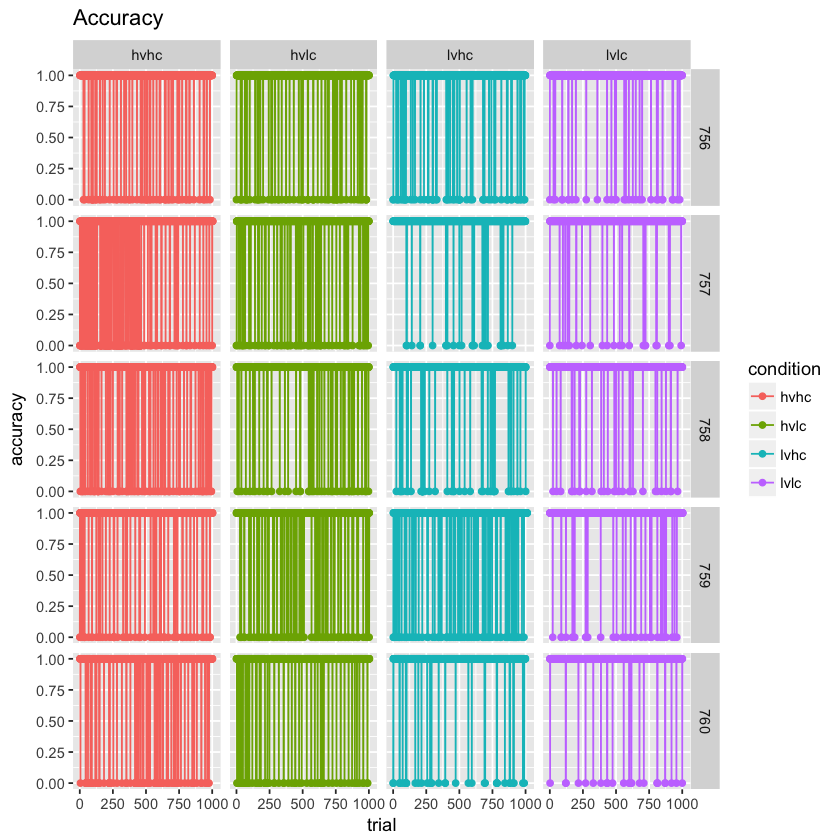

In [51]:
ggplot(sparse_df, aes(trial, accuracy, color=condition)) +
    geom_point() + geom_line() + facet_grid(ID ~ condition) + ggtitle('Accuracy')

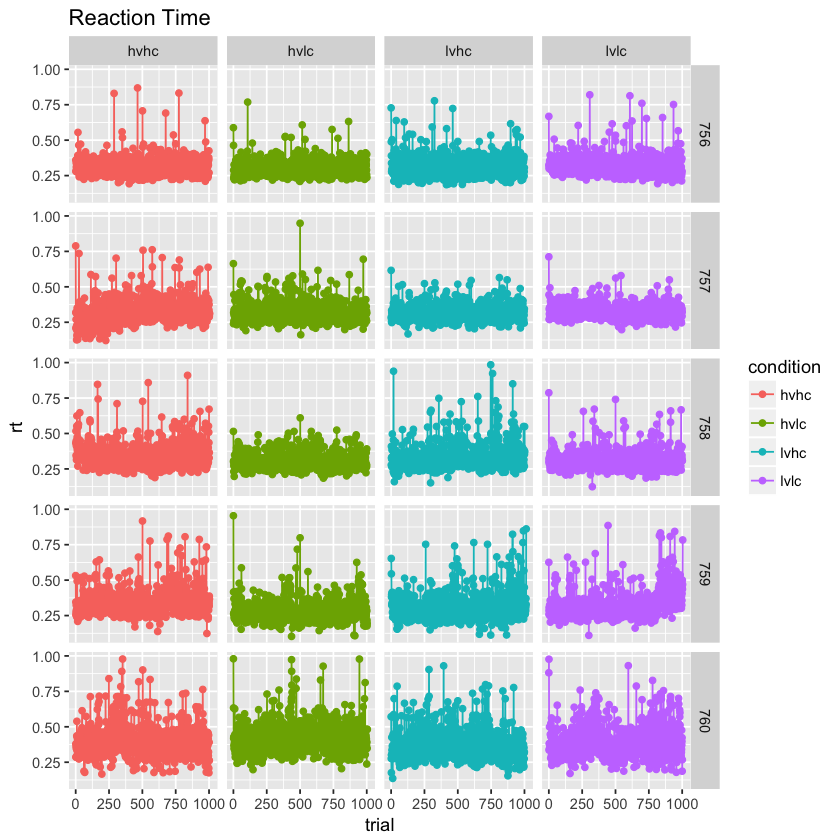

In [50]:
ggplot(sparse_df, aes(trial, rt, color=condition)) +
    geom_point() + geom_line() + facet_grid(ID ~ condition) + ggtitle('Reaction Time')

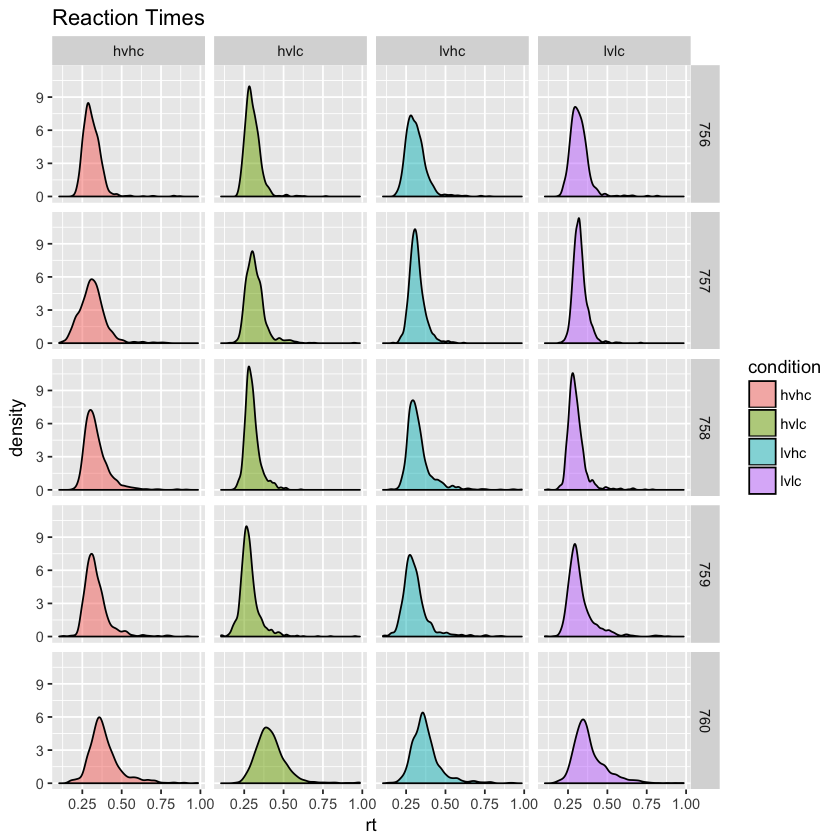

In [22]:
ggplot(sparse_df, aes(rt, fill=condition)) +
geom_density(alpha=0.5) + facet_grid(ID ~ condition) + ggtitle('Reaction Times')

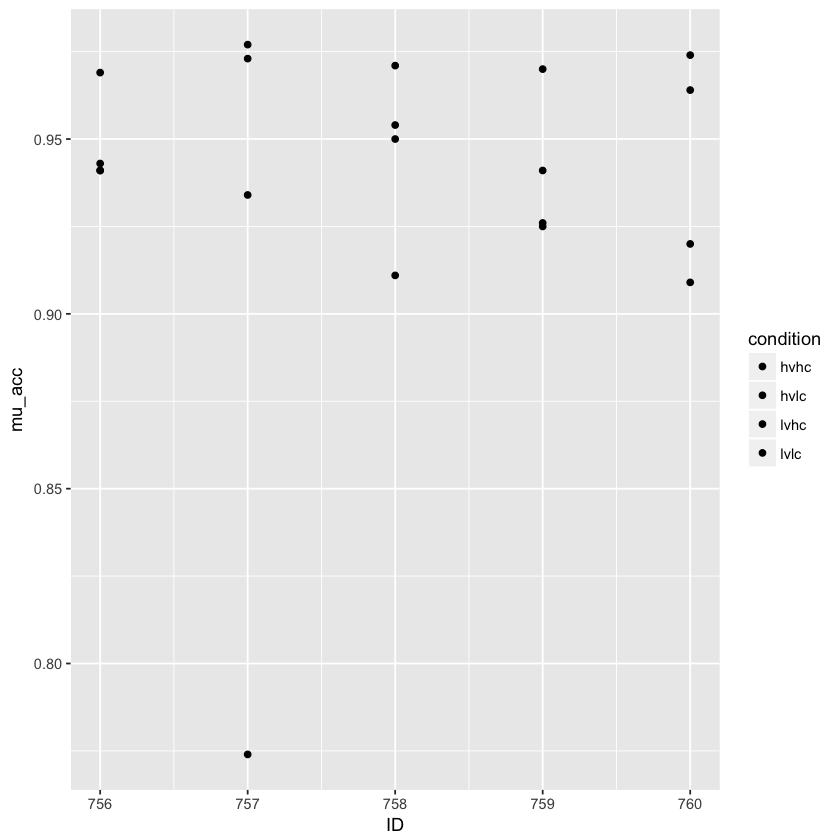

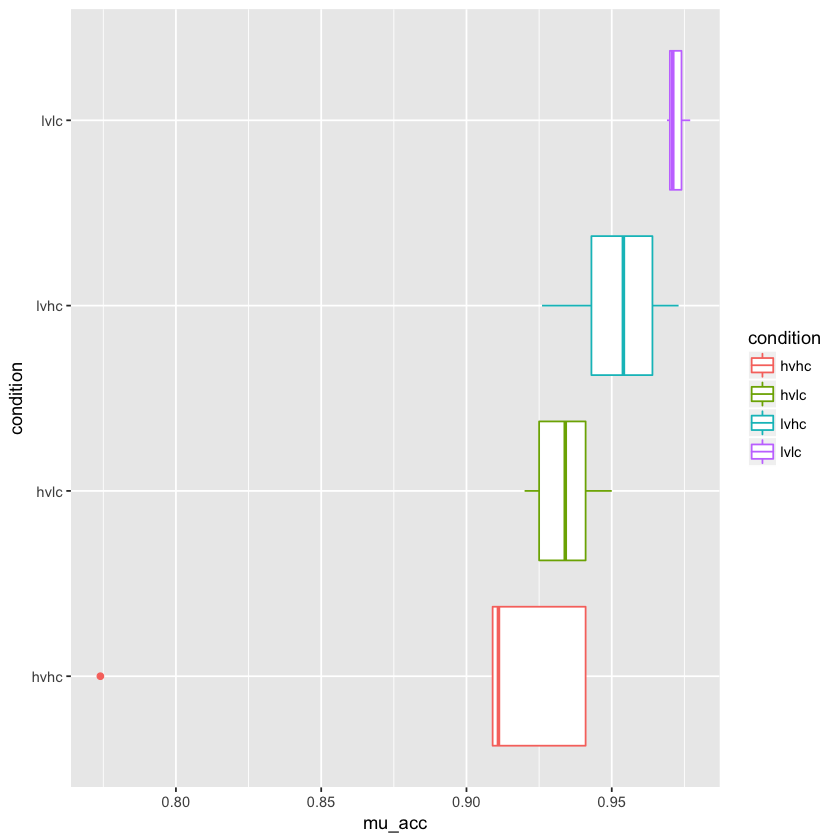

In [92]:
library(wesanderson)

acc_stats <- sparse_df %>% 
    group_by(ID, condition) %>% summarize(mu_acc=mean(accuracy))

ggplot(acc_stats, aes(mu_acc, ID)) +
    geom_point(aes(fill=condition)) + coord_flip()

ggplot(acc_stats, aes(x=condition, y=mu_acc)) +
    geom_boxplot(aes(color=condition)) + coord_flip()

In [96]:
install.packages('ggthemes')


The downloaded binary packages are in
	/var/folders/p1/jq19by4n7gd9qnhl3cywmknr0000gn/T//RtmpFsQhRV/downloaded_packages


Picking joint bandwidth of 0.0111
Picking joint bandwidth of 0.0111
Picking joint bandwidth of 0.0108
Picking joint bandwidth of 0.0119
Picking joint bandwidth of 0.0171


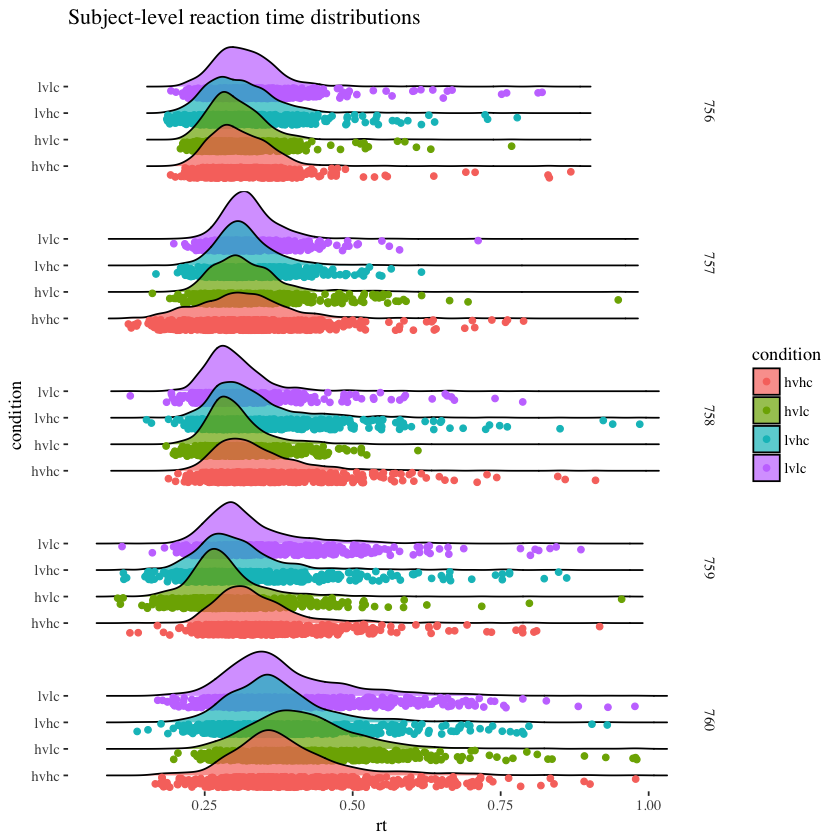

In [186]:
library(ggridges)
library(ggthemes)

ggplot(sparse_df, aes(rt,condition, fill=condition)) +
  geom_density_ridges(jittered_points = TRUE, position = "raincloud",
                      alpha = 0.7, aes(point_color = condition, point_fill = condition)) + facet_grid(ID ~.) + ggtitle('Subject-level reaction time distributions ') +   theme_tufte() 

Picking joint bandwidth of 0.0098


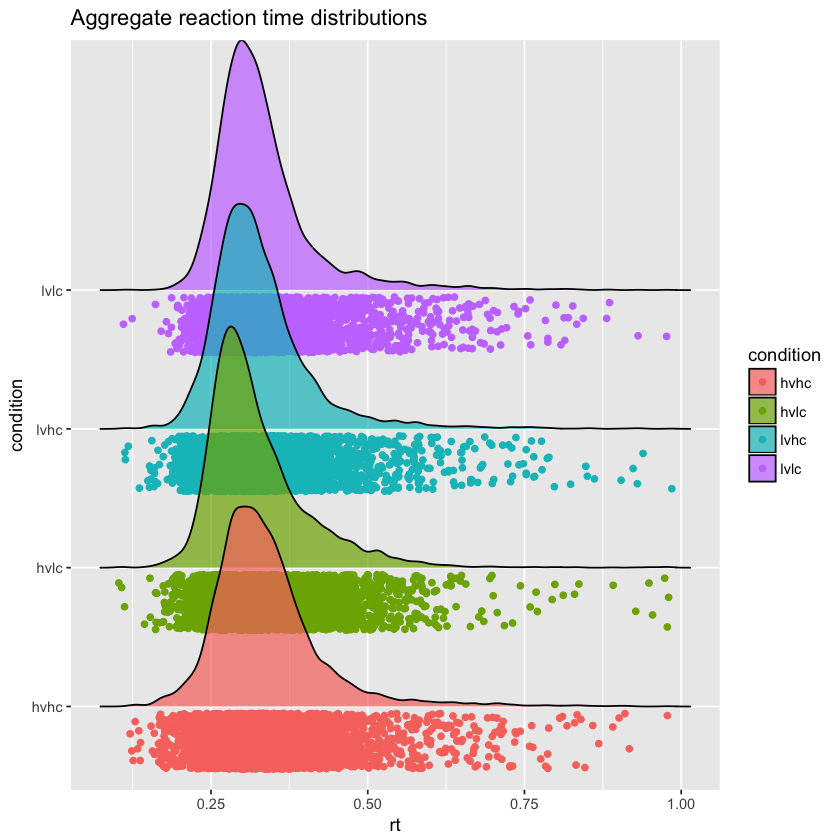

In [45]:
ggplot(sparse_df, aes(rt,condition, fill=condition)) +
  geom_density_ridges(jittered_points = TRUE, position = "raincloud",
                      alpha = 0.7, aes(point_color = condition, point_fill = condition)) + ggtitle('Aggregate reaction time distributions ')

Picking joint bandwidth of 0.0496
Picking joint bandwidth of 0.0553
Picking joint bandwidth of 0.0498
Picking joint bandwidth of 0.0527
Picking joint bandwidth of 0.0511


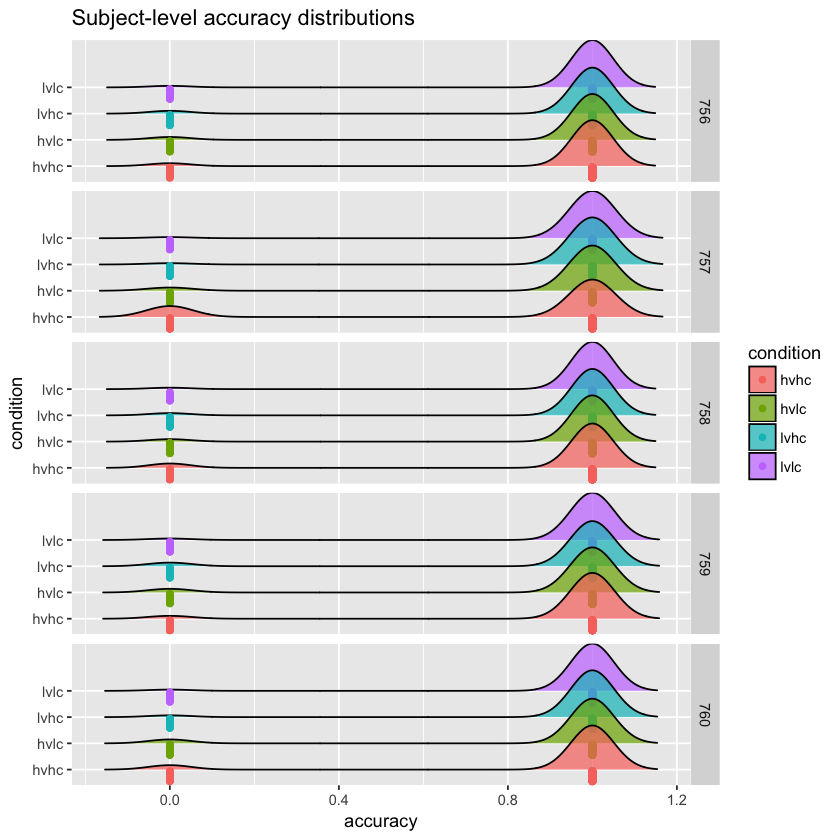

In [81]:
ggplot(sparse_df, aes(accuracy,condition, fill=condition)) +
  geom_density_ridges(jittered_points = TRUE, position = "raincloud",
                      alpha = 0.7, aes(point_color = condition, point_fill = condition)) + facet_grid(ID ~.) + ggtitle('Subject-level accuracy distributions ')

Picking joint bandwidth of 0.0382


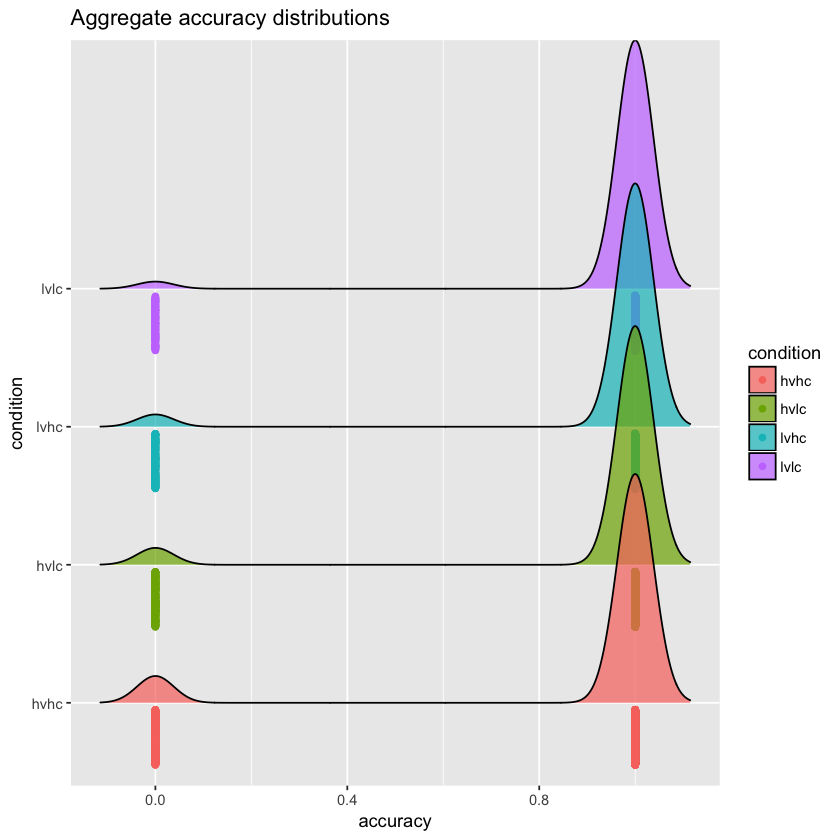

In [82]:
ggplot(sparse_df, aes(accuracy,condition, fill=condition)) +
  geom_density_ridges(jittered_points = TRUE, position = "raincloud",
                      alpha = 0.7, aes(point_color = condition, point_fill = condition)) +  ggtitle('Aggregate accuracy distributions ')

In [182]:
#step 1: find the indices that correspond to the changepoint 
cp_idx <- which(clean_df$cp_with_slow_fast == 1)
#get trial before cp 
start_idx <- cp_idx - 1 
#add e. length  
end_idx <- cp_idx + 9

In [183]:
#construct intervals according to the start and end idx 
intervals <- mapply(seq, start_idx, end_idx)

In [184]:
#check intervals
start_idx[3]
end_idx[3]
intervals[,3]
#next, construct new df with these vals. 

#interval columns are cps
#rows are trials

[1] 316

[1] 326

[1] 316 317 318 319 320 321 322 323 324 325 326

In [200]:
#testing, testing 
#NEED TO SEPARATE by condition 

#this is collapsed across conditions 
#just a test of indexing 
rt_vec <- 1:nrow(intervals)
acc_vec <- 1:nrow(intervals)

for (idx in 1:nrow(intervals)){
    rt_vec[idx] = mean(clean_df[intervals[idx,], 'rt'])
    acc_vec[idx] = mean(clean_df[intervals[idx,], 'accuracy'])
}

print(rt_vec); print(acc_vec)

 [1] 0.3355365 0.3440269 0.3439777 0.3276609 0.3258949 0.3315107 0.3281397
 [8] 0.3324130 0.3317014 0.3305934 0.3294117
 [1] 0.96009390 0.06338028 0.81455399 0.89906103 0.92723005 0.94600939
 [7] 0.94600939 0.94366197 0.94835681 0.95774648 0.94131455


Warning message in par(height = 2, width = 2):
“"height" is not a graphical parameter”Warning message in par(height = 2, width = 2):
“"width" is not a graphical parameter”

pdf 
  2

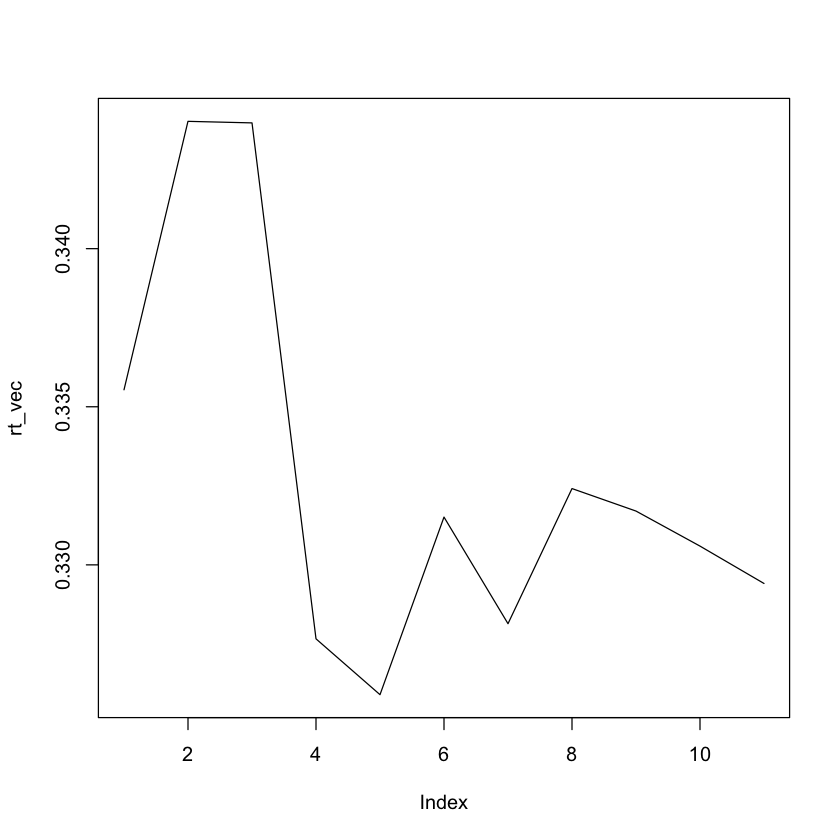

pdf 
  2

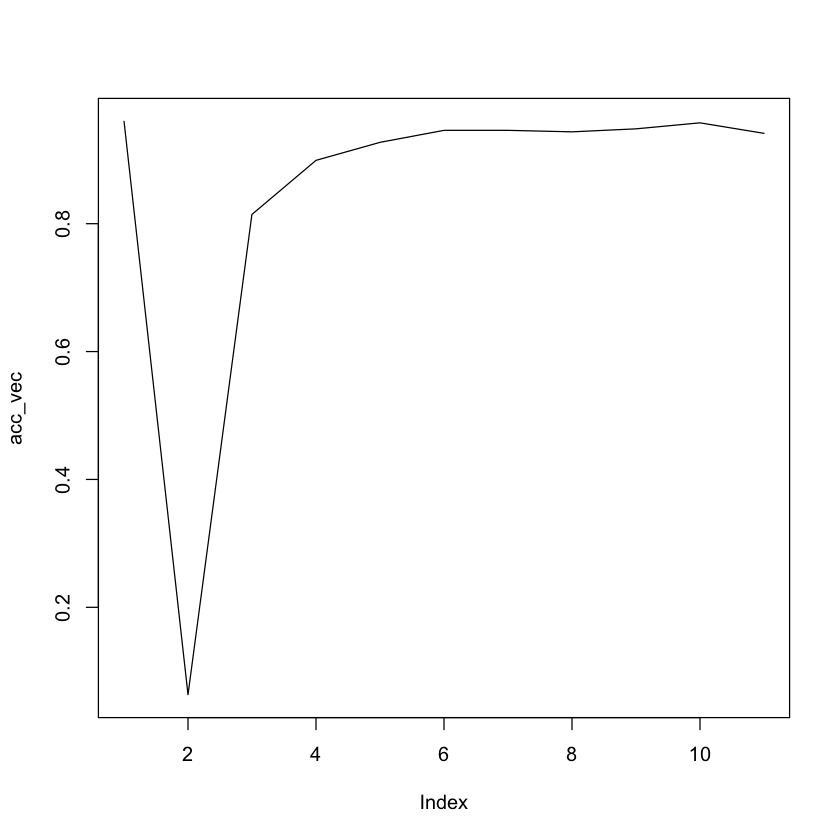

In [208]:
par(height = 2, width=2)
plot(rt_vec, type='l')
dev.print(pdf, 'pooled_rt.pdf')

plot(acc_vec, type='l')
dev.print(pdf, 'pooled_acc.pdf')


## **Conclusions [To be completed]**